In [20]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("./Git Hub/ml-basics/data/diabetes.csv").iloc[:,1:]

In [3]:
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
output = 'Diabetic'

In [4]:
Missing_Col = ['PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI']

In [5]:
for i in Missing_Col:
    data[i].replace(0,data[i].mean(),inplace = True)

In [6]:
bins = [ 0, 14, 24, 64, 100]
data['Age'] = pd.cut(data['Age'] , bins=bins,
               labels=['Children','Youth','Adults','Seniors'],
               include_lowest=True)

In [7]:
data.Diabetic.replace(0,'Yes',inplace = True)
data.Diabetic.replace(1,'No',inplace = True)

In [8]:
data

Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
0                0            171                      80                34   
1                8             92                      93                47   
2                7            115                      47                52   
3                9            103                      78                25   
4                1             85                      59                27   
...            ...            ...                     ...               ...   
14995           10             65                      60                46   
14996            2             73                      66                27   
14997            0             93                      89                43   
14998            0            132                      98                18   
14999            3            114                      65                47   

       SerumInsulin        BMI  DiabetesPedigree     Age Diabetic  
0                23  43.509726          1.213191   Youth      Yes  
1                36  21.240576          0.158365   Youth      Yes  
2                35  41.511523          0.079019   Youth      Yes  
3               304  29.582192          1.282870  Adults       No  
4                35  42.604536          0.549542   Youth      Yes  
...             ...        ...               ...     ...      ...  
14995           177  33.512468          0.148327  Adults       No  
14996           168  30.132636          0.862252  Adults       No  
14997            57  18.690683          0.427049   Youth      Yes  
14998           161  19.791645          0.302257   Youth      Yes  
14999           512  36.215437          0.147363  Adults       No  

[15000 rows x 9 columns]

In [9]:
data_val = data.iloc[:,:].values
data_val

array([[0, 171, 80, ..., 1.213191354, 'Youth', 'Yes'],
       [8, 92, 93, ..., 0.158364981, 'Youth', 'Yes'],
       [7, 115, 47, ..., 0.079018568, 'Youth', 'Yes'],
       ...,
       [0, 93, 89, ..., 0.427048955, 'Youth', 'Yes'],
       [0, 132, 98, ..., 0.302257208, 'Youth', 'Yes'],
       [3, 114, 65, ..., 0.14736285, 'Adults', 'No']], dtype=object)

# Encoding

In [10]:
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from sklearn.compose import ColumnTransformer

In [15]:
lb = LabelEncoder()
ohe = OneHotEncoder()
data_lb = data.apply(lb.fit_transform)
data_lb

Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
0                0            127                      52                27   
1                8             48                      65                40   
2                7             71                      19                45   
3                9             59                      50                18   
4                1             41                      31                20   
...            ...            ...                     ...               ...   
14995           10             21                      32                39   
14996            2             29                      38                20   
14997            0             49                      61                36   
14998            0             88                      70                11   
14999            3             70                      37                40   

       SerumInsulin    BMI  DiabetesPedigree  Age  Diabetic  
0                 9  13240             14351    2         1  
1                22   3713              5039    2         1  
2                21  12316                55    2         1  
3               264   6583             14460    0         0  
4                21  12827             10714    2         1  
...             ...    ...               ...  ...       ...  
14995           137   8039              4408    0         0  
14996           128   6800             13248    0         0  
14997            43    498              9720    2         1  
14998           121   1626              9556    2         1  
14999           465   9157              4347    0         0  

[15000 rows x 9 columns]

In [16]:
ct=ColumnTransformer(transformers=[('encode',OneHotEncoder(),[7,8])],remainder='passthrough')

In [17]:
data_encoded = ct.fit_transform(data_lb)

In [18]:
pd.DataFrame(data_encoded)

0    1    2    3    4     5      6     7     8      9        10  \
0      0.0  0.0  1.0  0.0  1.0   0.0  127.0  52.0  27.0    9.0  13240.0   
1      0.0  0.0  1.0  0.0  1.0   8.0   48.0  65.0  40.0   22.0   3713.0   
2      0.0  0.0  1.0  0.0  1.0   7.0   71.0  19.0  45.0   21.0  12316.0   
3      1.0  0.0  0.0  1.0  0.0   9.0   59.0  50.0  18.0  264.0   6583.0   
4      0.0  0.0  1.0  0.0  1.0   1.0   41.0  31.0  20.0   21.0  12827.0   
...    ...  ...  ...  ...  ...   ...    ...   ...   ...    ...      ...   
14995  1.0  0.0  0.0  1.0  0.0  10.0   21.0  32.0  39.0  137.0   8039.0   
14996  1.0  0.0  0.0  1.0  0.0   2.0   29.0  38.0  20.0  128.0   6800.0   
14997  0.0  0.0  1.0  0.0  1.0   0.0   49.0  61.0  36.0   43.0    498.0   
14998  0.0  0.0  1.0  0.0  1.0   0.0   88.0  70.0  11.0  121.0   1626.0   
14999  1.0  0.0  0.0  1.0  0.0   3.0   70.0  37.0  40.0  465.0   9157.0   

            11  
0      14351.0  
1       5039.0  
2         55.0  
3      14460.0  
4      10714.0  
...        ...  
14995   4408.0  
14996  13248.0  
14997   9720.0  
14998   9556.0  
14999   4347.0  

[15000 rows x 12 columns]

# SMOTE

In [21]:
credit = pd.read_csv('./Datasets- I/creditcard.csv')

In [30]:
credit.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [22]:
credit.shape

(284807, 31)

In [27]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(credit['Class'].value_counts()[0]/len(credit) * 100,2), '% of the dataset')
print('Frauds', round(credit['Class'].value_counts()[1]/len(credit) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


<AxesSubplot:xlabel='Class', ylabel='count'>

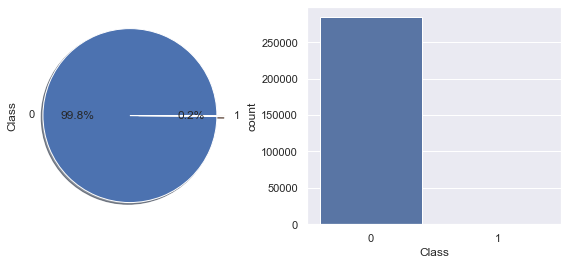

In [39]:
f,ax=plt.subplots(1,2,figsize=(10,4))


credit.Class.value_counts().plot.pie(
    explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
sns.countplot('Class',data=credit,ax=ax[1])

In [43]:
df = credit

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [45]:
lr = LogisticRegression().fit(X_train, y_train)

In [46]:
Y_Test_pred = lr.predict(X_test)

In [48]:
cm = confusion_matrix(y_test, Y_Test_pred)
print (cm)

[[71052    30]
 [   41    79]]


In [63]:
def generate_classification_report(yr,yp):
    print("Accuracy  :", accuracy_score(yr,yp))
    print("Precision :", precision_score(yr,yp))
    print("Recall    :", recall_score(yr,yp))
    print("F1        :", f1_score(yr,yp))
    return

In [55]:
generate_classification_report(y_test,Y_Test_pred)

Accuracy  : 0.9990028369989608
Precision : 0.7247706422018348
Recall    : 0.6583333333333333
F1        : 0.6899563318777292


In [67]:
def generate_ROC(model,xt,yt):
    yp = lr.predict_proba(xt)
    fpr, tpr, thresholds = roc_curve(yt, yp[:,1])
    fig = plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

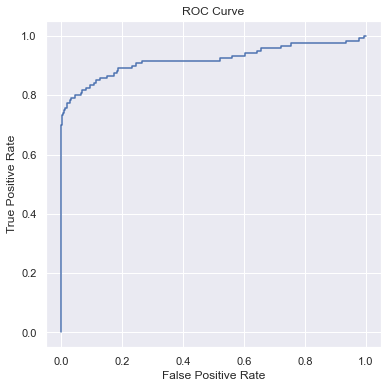

In [68]:
generate_ROC(lr,X_test,y_test)